In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

(3, 3)
[[0 0 0]
 [0 0 0]
 [0 0 0]]


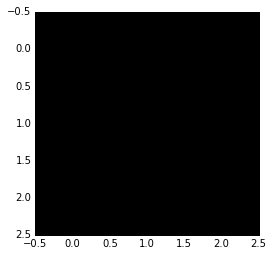

In [11]:
img = np.zeros((3,3), dtype = np.uint8)
print img.shape #3*3 array
print img
plt.imshow(img, 'gray')

plt.show()

(3, 3, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


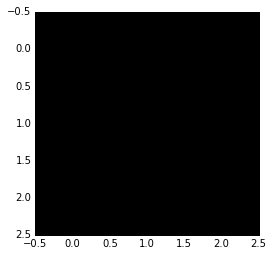

In [12]:
cv2.imwrite('img.jpg', img) #cv2.存檔
image = cv2.imread('img.jpg') #即使是灰階圖, imread仍會以GBR的3通道讀進來
print image.shape 
print image
plt.imshow(image, 'gray')
plt.show()

In [ ]:
#imread(路徑, 參數)
#參數:
#IMREAD_ANYCOLOR = 4
#IMREAD_ANYDEPTH = 2
#IMREAD_COLOR = 1
#IMREAD_GRAYSCALE = 0
#IMREAD_LOAD_GDAL = 8
#IMREAD_UNCHANGED = -1

#imwrite(路徑檔名, 圖物件)

(3, 3)


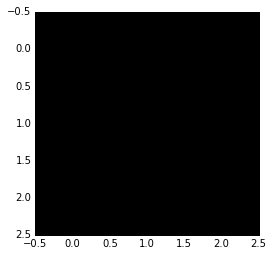

In [7]:
cv2.imwrite('img.jpg', img)
image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE) #指定cv2.IMREAD_GRAYSCALE給imread
print image.shape 
plt.imshow(image, 'gray') #plt.imshow(圖物件, 灰階) #不指定灰階的話, 預設是RGB
plt.show()

[[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


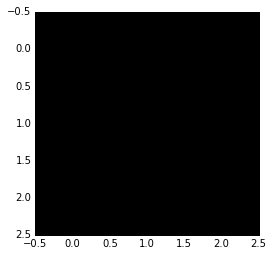

In [9]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) #灰階轉成RGB的3通道
print img_RGB
plt.imshow(img_RGB)
plt.show()

In [ ]:
#byteArray = bytearray(image) #若通道剛好是8bit, 則可直接轉換成byteArray
#grayImage = np.array(grayByteArray).reshape(height, width) #若byteArray是剛好的字節, 則可以轉換成np.array的圖像
#bgrImage = np.array(bgrByteArray).reshape(height, width, 3)

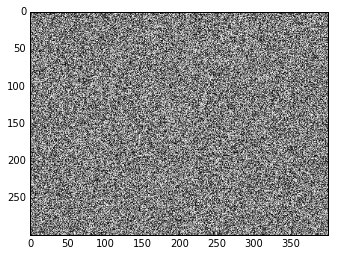

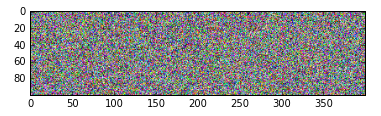

In [13]:
import os
#make an array of 120000 random bytes.
#randomByteArray = bytearray(os.urandom(120000))
randomByteArray = np.random.randint(0, 256, 120000) #效能較os.urandom高
flatNumpyArray = np.array(randomByteArray)

#convert the array to make a 400*300 grayscale image.
grayImage = flatNumpyArray.reshape(300,400)
plt.imshow(grayImage, 'gray')
cv2.imwrite('randomGray.png', grayImage)
plt.show()

#convert the array to make a 100*300 color image.
bgrImage = flatNumpyArray.reshape(100,400,3)
plt.imshow(bgrImage)
cv2.imwrite('randomColor.png', bgrImage)
plt.show()

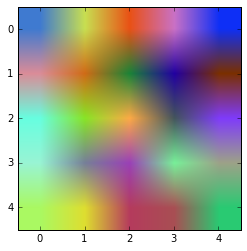

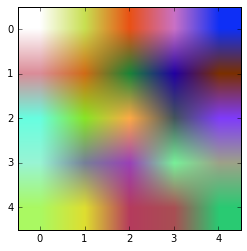

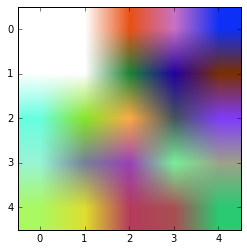

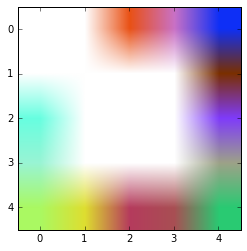

In [14]:
img = cv2.imread('randomColor.png') 
plt.imshow(img[0:5,0:5]) #取上面隨機彩圖的最左上角5*5的區域
plt.show()

img[0,0] = [255,255,255] #指定座標0,0的像素點, 3通道改為255,255,255 (白色)
plt.imshow(img[0:5,0:5])
plt.show()

img[0,1] = [255,255,255]
img[1,0] = [255,255,255]
img[1,1] = [255,255,255]  #指定左上角1*1區域內都改為白色
plt.imshow(img[0:5,0:5])  
plt.show()

for i in xrange(1,4):     #指定像素橫軸與縱軸1~3的3*3區域內改成白色
    for j in xrange(1,4):
        img[i,j] = [255,255,255]
plt.imshow(img[0:5,0:5])
plt.show()        

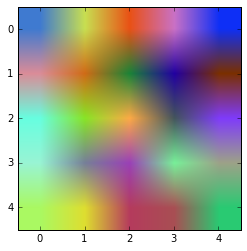

63


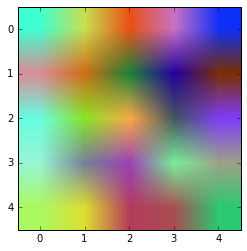

63


In [15]:
#np.array.item(y座標, x座標, 通道(B,G,R))
img = cv2.imread('randomColor.png')
plt.imshow(img[0:5,0:5])
plt.show()
print img.item(0,0,0) #輸出np.array.item(x座標, y座標, 通道(B))的數值

img.itemset((0,0,1),255) #修改np.array.item(x座標, y座標, 通道(G))的數值
plt.imshow(img[0:5,0:5])
plt.show()
print img.item(0,0,0)

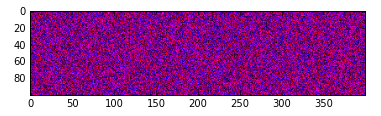

In [16]:
img = cv2.imread('randomColor.png')
img[:,:,1] = 0  #img[y座標起點:y座標終點, x座標起點:x座標終點, BGR通道] #將所有像素的G都改為0
plt.imshow(img)
plt.show()

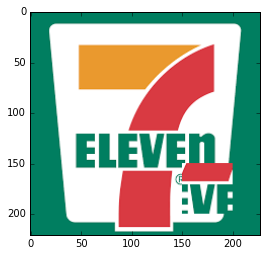

In [21]:
img = cv2.imread('7-11-logo-2.png')
region = img[100:150,100:150] #指定區域
img[150:200,150:200] = region #帶入另一塊相同大小的區域, 注意大小一定要剛好, 否則會拋exception
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
# 列出圖片相關的數值
img = cv2.imread('7-11-logo-2.png')
print img.shape   #長(y), 寬(x), 值(通道)
x,y,z = img.shape #抽出3個變量
print x*y*z
print img.size    #變量乘積相等於size, 可看出size指的是位元組
print img.dtype   #dtype, nd.array的型態/類型

(221, 228, 3)
151164
151164
uint8


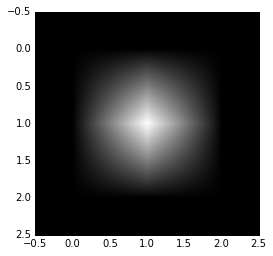

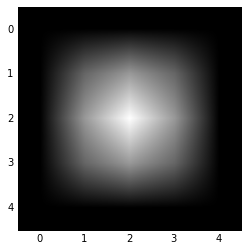

In [23]:
#kernel 濾波矩陣, 濾波器
#一組權重的集合, 套用在圖上的一個區域去產生一個像素
#大小為7的kernel表示7*7 = 49 的區域

import cv2
import numpy as np
import scipy as sp

# 3*3銳利化的濾波器
kernel_3x3 = np.array( 
    [[-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]])

# 5*5銳利化的濾波器
kernel_5x5 = np.array(
    [[-1,-1,-1,-1,-1],
    [-1, 1, 2, 1,-1],
    [-1, 2, 4, 2,-1],
    [-1, 1, 2, 1,-1],
    [-1,-1,-1,-1,-1]])

plt.imshow(kernel_3x3,'gray')
plt.show()

plt.imshow(kernel_5x5,'gray')
plt.show()

In [ ]:
#HPF(High Pass Filter, 高通濾波器)
#根據周遭像素的亮度差來提升亮度
#圖片上產生銳利化的效果
#kernel內容會是中央一個很高的正值, 遭周是越來越低的值
#比如:
#-1,-1,-1,
#-1, 9,-1,
#-1,-1,-1,
#對目標像素*9減去周遭像素*-1, 擴大目標像素與鄰近像素的差異

#LPF(Low Pass Filter, 低通濾波器)
#根據周遭亮度差小於特定值時作平滑
#產生模糊化的效果
#kernel內容會是平均分配的值
#比如:
#0.04,0.04,0.04,
#0.04,0.04,0.04,
#0.04,0.04,0.04,

#脊狀ridge或稱浮雕embossed特效的kernel
#-2,-1, 0,
#-1, 1, 1,
# 0, 1, 2,

#對影像套用kernel的過程稱作卷積運算Convolution
#kernel通常總和為1, 表示卷積過的像素點亮度不變

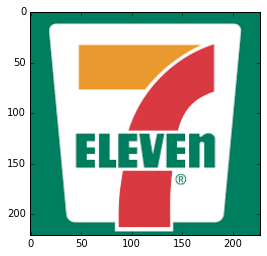

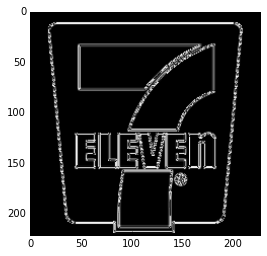

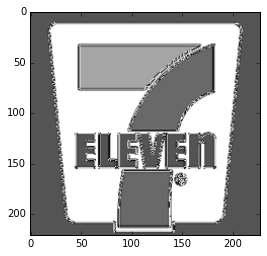

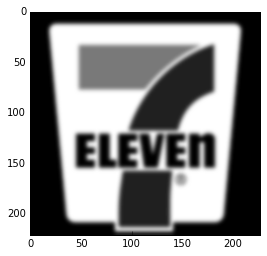

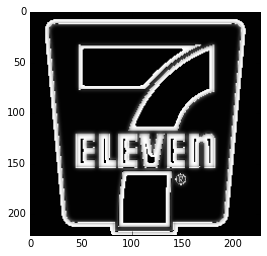

In [25]:
from scipy import ndimage

im = cv2.imread('7-11-logo-2.png')  #原圖
RGB_im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(RGB_im)
plt.show()

img = cv2.imread('7-11-logo-2.png', 0) #灰階才能往下做
k3 = ndimage.convolve(img, kernel_3x3) #3*3 kernel作卷積
plt.imshow(k3,'gray')
plt.show()

g_test = img - k3 # 原圖 - 3*3捲積
plt.imshow(g_test,'gray')
plt.show()

blurred = cv2.GaussianBlur(img, (11,11), 0) #高斯模糊
plt.imshow(blurred,'gray')
plt.show()

g_hpf = img - blurred # 原圖 - 高斯模糊
plt.imshow(g_hpf,'gray')
plt.show()